In [1]:
%matplotlib notebook

In [2]:
import hyperspy.api as hs
import atomap.api as am
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from scipy.ndimage import gaussian_filter

In [4]:
import numpy as np

In [5]:
filename = r'Y:\data\2019\cm22979-6\processing\Focal series single atom/series5_aligned_constantdrift.tif'

In [6]:
series = hs.load(filename)

<IPython.core.display.Javascript object>


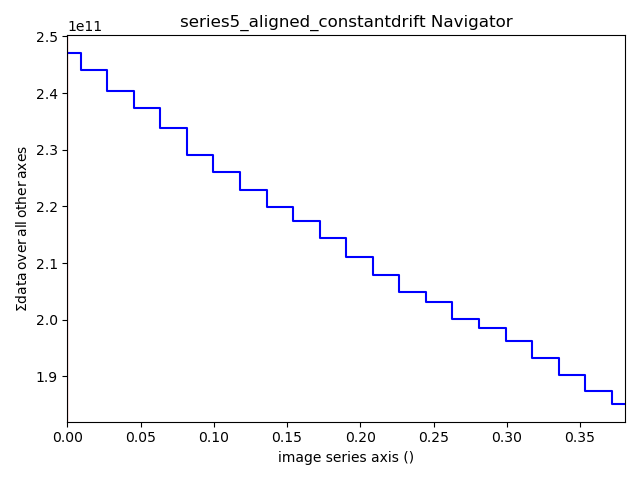

<IPython.core.display.Javascript object>


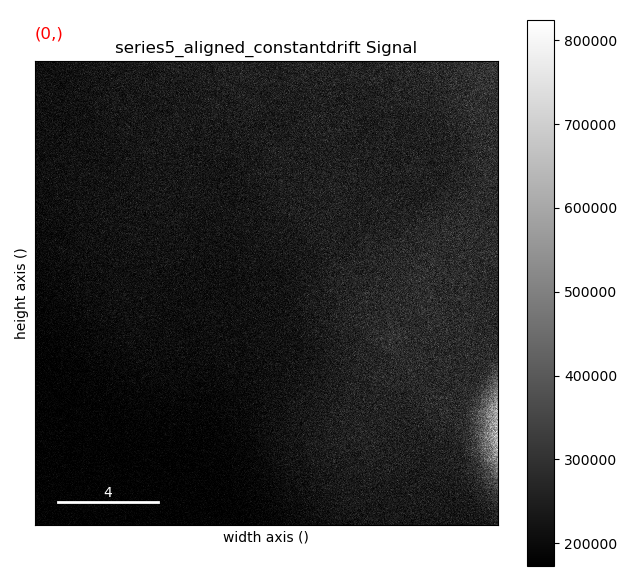

In [7]:
series.plot()

In [8]:
series_cropped = series.isig[4.212:, 1.852:]

In [9]:
series_filtered = hs.signals.Signal2D(gaussian_filter(series_cropped.data,sigma=0.5))

<IPython.core.display.Javascript object>


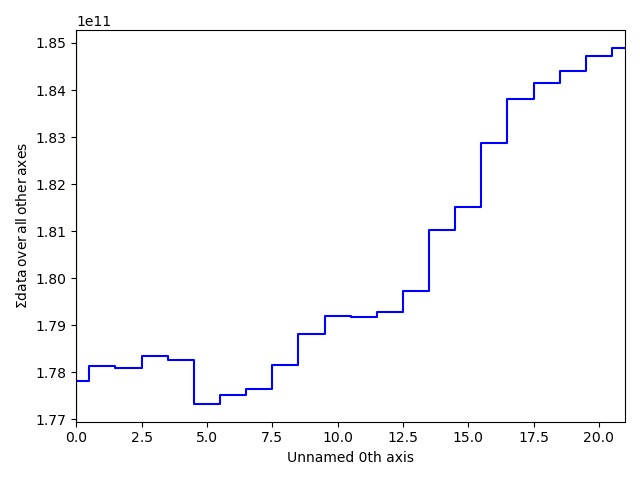

<IPython.core.display.Javascript object>


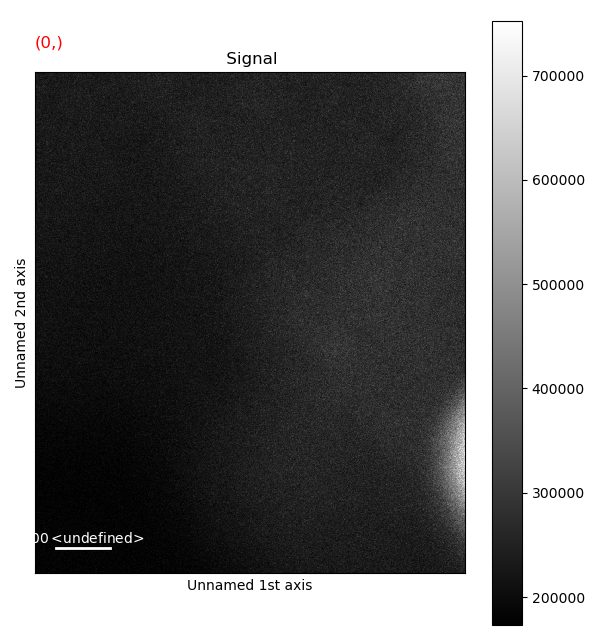

In [10]:
series_filtered.plot()

In [11]:
import atomap

In [12]:
from ipywidgets import interact
import ipywidgets as widgets

In [23]:
atom_positions = []
for i in range(series_filtered.axes_manager[0].size):
    atom_positions.append([])

def f(x):
    atom_positions[x] = am.add_atoms_with_gui(series_filtered.inav[x],atom_positions[x],clim=(100000,400000))

In [24]:
interact(f,x=widgets.IntSlider(min=0, max=series_filtered.axes_manager[0].size-1, step=1, value=series_filtered.axes_manager[0].size/2))

interactive(children=(IntSlider(value=11, description='x', max=21), Output()), _dom_classes=('widget-interact'…

<function __main__.f(x)>

In [46]:
def plot_single_atoms_3d(atom_positions_3d,series,focal_step):
    xs = []
    ys = []
    zs = []
    for num,i in enumerate(atom_positions_3d):
        if i != []:
            for j in i:
                xs.append(j[0]*series.axes_manager[1].scale)
                ys.append(j[1]*series.axes_manager[2].scale)
                zs.append(num*focal_step)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(xs, ys, zs, c='r');
    scaling = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz']);
    ax.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)
    #Axes3D.scatter(xs=xs, ys=ys, zs=zs, zdir='z')

<IPython.core.display.Javascript object>


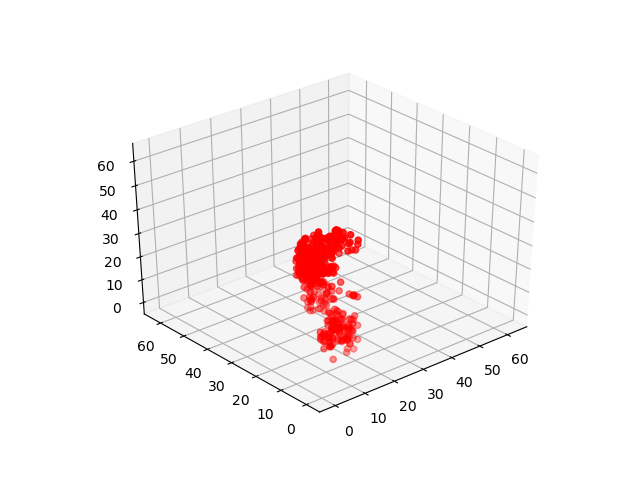

In [47]:
plot_single_atoms_3d(atom_positions,series,focal_step=3)